# **Algunas Operaciones con Imágenes**

In [1]:
import numpy as np # operaciones n-dim
from skimage.io import imread, imsave # leer y guardar imágenes
import matplotlib.pyplot as plt # mostrar imágenes

### **Leer imágenes a colores**



In [3]:
im = imread('http://blog.redbus.pe/wp-content/uploads/2019/12/foto-lima.png')
print(im.shape)

# RGB (jpg, jpeg, etc) -> Red, Green, Blue
# RGBA (png) -> R, G, B + A (Alpha) (transparencia)
# 1 capa -> escala de grises!!

# dimensiones:
# Alto, Ancho, Capas

(628, 1165, 4)


In [4]:
print(im.dtype)
# uint8 -> entero sin singo de 8 bits
# float32 -> float de 32 bits
# float64 -> float de 64 bits

uint8


In [5]:
print(im.min())

0


In [6]:
print(im.max())

255


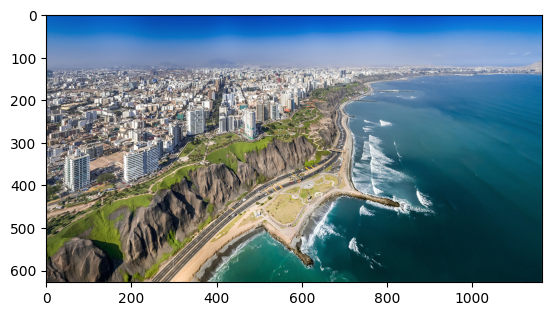

In [7]:
plt.imshow(im)

### **Leer imágenes a b/w  a.k.a. grayscale**

In [8]:
im = imread('http://blog.redbus.pe/wp-content/uploads/2019/12/foto-lima.png',
            as_gray=True)
# promediar las capas RGB -> 255, 0, 10 -> promedio(255,0,10) -> x
# luego se normaliza
print(im.shape)
# 628 alto, 1165 ancho, 1 capa (Grises)

(628, 1165)


In [9]:
print(im.dtype)

float64


In [10]:
print(im.min())

0.0


In [11]:
print(im.max())

1.0


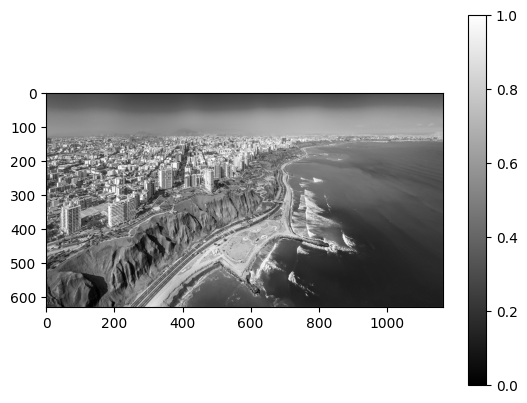

In [12]:
plt.imshow(im, cmap = 'gray')
plt.colorbar()

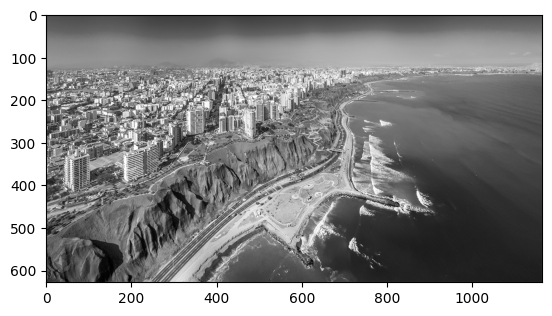

In [13]:
plt.imshow(im, cmap='gray')

### **Convertir a Blanco y Negro**

In [14]:

cursos = ['Desarrollo', 'IA', 'Comp. Grafica', 'Seguridad']
cursos[::]

['Desarrollo', 'IA', 'Comp. Grafica', 'Seguridad']

In [15]:
im = imread('http://blog.redbus.pe/wp-content/uploads/2019/12/foto-lima.png')[:,:,:3]
# solo tomar los valores R,G,B
print(im.shape)

(628, 1165, 3)


In [16]:
im.dtype

dtype('uint8')

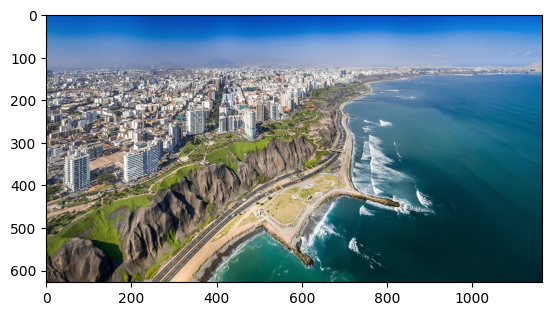

In [17]:
plt.imshow(im)

In [18]:
im = im.mean(axis=2)
im.shape
# solo 1 capa

(628, 1165)

In [19]:
print(im.dtype)

float64


In [20]:
print(im.min())

0.0


In [21]:
print(im.max())

255.0


In [22]:
im = im / 255.

In [23]:
print(im.min())

0.0


In [24]:
print(im.max())

1.0


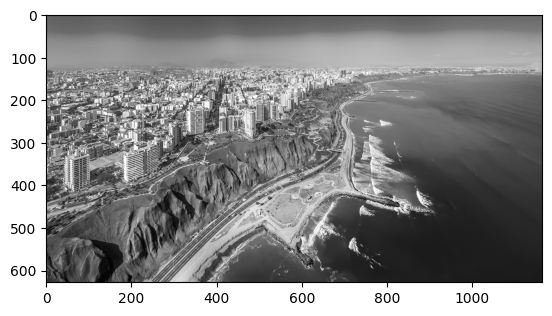

In [25]:
plt.imshow(im, cmap='gray')

### **Operaciones aritméticas con Imágenes -> Adición de imágenes e Interpolación**

In [27]:
#@title Descargar Data de Dígitos
from tensorflow.keras.datasets import mnist
from IPython.display import Image
import imageio
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
# convertir en float32 y luego normalizar
x_test = x_test.astype('float32') / 255.
# convertir en float32 y luego normalizar
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


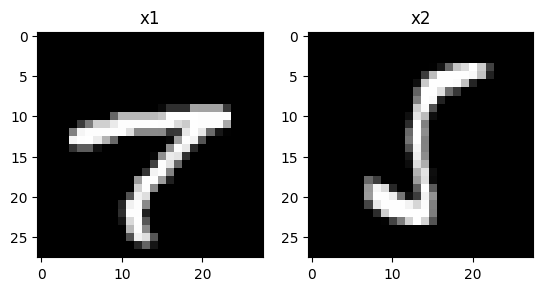

In [28]:
#@title Obtener Dígitos **x1** y **x2** (aleatoriamente)
idx1 = np.random.randint(x_test.shape[0])
idx2 = np.random.randint(x_test.shape[0])
x1 = x_test[idx1][None,:]
x2 = x_test[idx2][None,:]
plt.figure()
plt.subplot(1,2, 1)
plt.title("x1")
plt.imshow(x1[0,:,:,0], cmap='gray')
plt.subplot(1,2, 2)
plt.title("x2")
plt.imshow(x2[0,:,:,0], cmap='gray')
plt.show()

### Interpolar en el espacio de los pixeles: $x_1 + \alpha*(x_2-x_1)$ donde $0 \leq \alpha \leq 1$

In [29]:
#@title Generar GIF
gif = []
for alpha in np.linspace(0,1,100):
  pixel_diff = x1 + alpha*(x2-x1)
  gif.append(np.uint8(pixel_diff[0,:,:,0]*255))
try:
  imageio.mimsave('im.gif', gif)
except:
  pass
Image('im.gif', format='png', width=255)

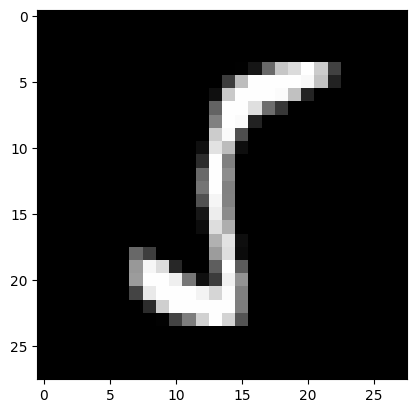

In [30]:
#@title Interpolación { run: "auto" }
alpha = 1 #@param {type:"slider", min:0, max:1, step:0.01}
pixel_diff = x1 + alpha*(x2-x1)
plt.imshow(pixel_diff[0,:,:,0], cmap='gray')